In [14]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score


In [23]:
#import data set
df = pd.read_csv("Salary_Data.csv")
# print(df)

In [29]:
#remove empty rows
df = df.dropna()
print(df.isnull().sum())

Age                0
Gender             0
Education Level    0
Job Title          0
YearsExperience    0
Salary             0
dtype: int64


In [42]:
# Select features including categorical ones
X = df[['YearsExperience', 'Age', 'Gender', 'Education Level', 'Job Title']] #also name as future

# One-hot encode categorical variables and scale numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['YearsExperience', 'Age']),
        ('cat', OneHotEncoder(drop='first',handle_unknown='ignore'), ['Gender', 'Education Level', 'Job Title'])
    ])

# Create a pipeline to preprocess data and train model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Define target variable
y = df['Salary']


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
# Fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['YearsExperience', 'Age']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Gender', 'Education Level',
                                                   'Job Title'])])),
                ('regressor', LinearRegression())])

In [50]:
# Make predictions on the test set
# new_data = pd.DataFrame(X_test, columns=X)
y_pred = pipeline.predict(X_test)
print(y_pred)

[191451.3371342  113868.43090485  72395.59362748 ...  64982.21857912
 222063.42327254 134341.53817711]


/home/mbsj145/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [51]:
score = r2_score(y_test, y_pred)
print(f"Model R^2 Score: {score}")

Model R^2 Score: 0.883576138519068


In [53]:
new_data = pd.DataFrame([[10, 35, 'Male', "Master's", 'Data Scientist']], columns=['YearsExperience', 'Age', 'Gender', 'Education Level', 'Job Title'])
# Use the pipeline to make a prediction
predicted_salary = pipeline.predict(new_data)
predicted_salary

array([186219.4678197])

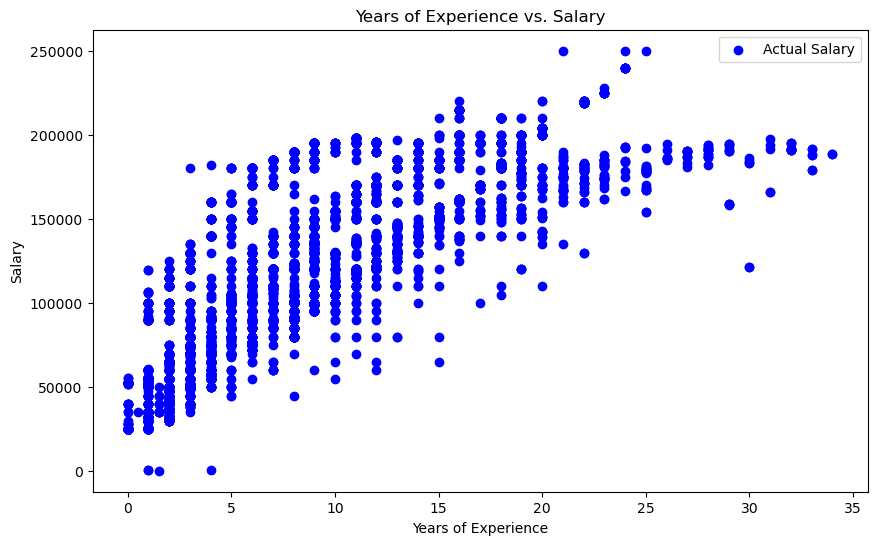

In [54]:
import matplotlib.pyplot as plt

# Visualize the relationship between YearsExperience and Salary
plt.figure(figsize=(10, 6))
plt.scatter(df['YearsExperience'], df['Salary'], color='blue', label='Actual Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs. Salary')
plt.legend()
plt.show()

/tmp/ipykernel_138160/1937398182.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3, color='red', label='Perfect Prediction Line')


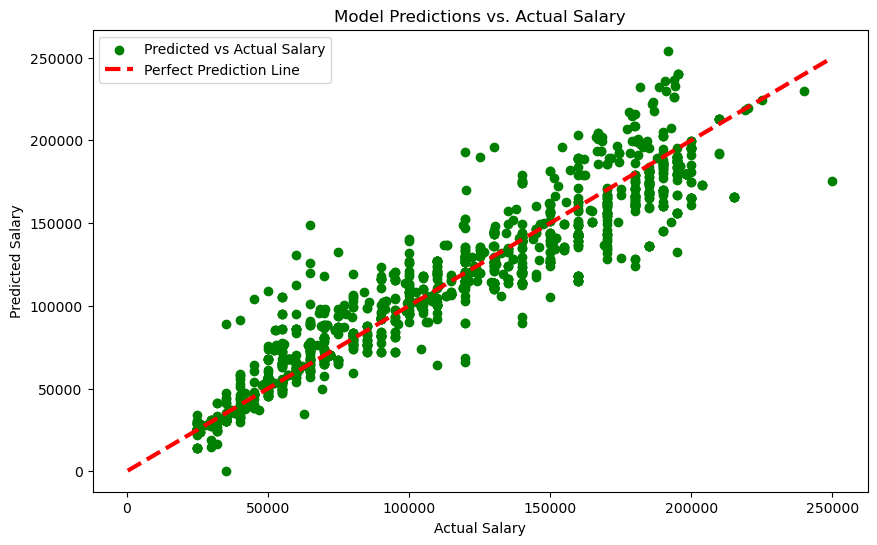

In [55]:
# Visualize model predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', label='Predicted vs Actual Salary')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3, color='red', label='Perfect Prediction Line')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Model Predictions vs. Actual Salary')
plt.legend()
plt.show()